In [6]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist


In [8]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [9]:
training_images.shape

(60000, 28, 28)

In [10]:
training_labels.shape

(60000,)

In [11]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(<matplotlib.image.AxesImage at 0x7f04a7e635b0>, 3)

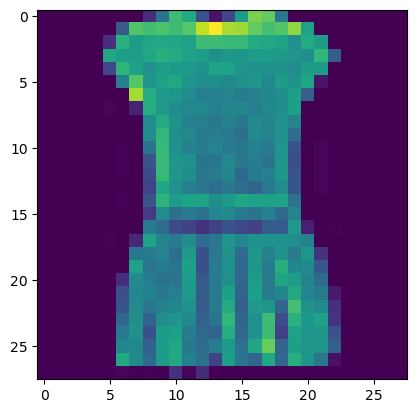

In [12]:
# Visualize the image
index = 3
plt.imshow(training_images[index]), training_labels[index]

In [13]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
# model arch
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


2022-12-03 04:53:09.700396: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4833 - accuracy: 0.8268
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3644 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3279 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3051 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2880 - accuracy: 0.8925


In [21]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

2022-12-03 04:53:30.521205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.3529 - accuracy: 0.8767


[0.3529182970523834, 0.8766999840736389]

In [22]:
classifications = model.predict(test_images)

 46/313 [===>..........................] - ETA: 0s 

2022-12-03 04:53:37.564003: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step


In [23]:
classifications[0]

array([1.6613788e-07, 3.9916708e-07, 3.1052613e-07, 8.7775942e-07,
       1.2891866e-07, 7.1425171e-04, 3.5311550e-06, 8.1042498e-02,
       5.5774262e-07, 9.1823721e-01], dtype=float32)

In [24]:
test_labels[0]

9

In [1]:
#convlution

In [26]:
# model arch
model = tf.keras.models.Sequential()



# Add convolutions and max pooling
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [27]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [28]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


2022-12-03 04:57:47.643844: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.4778 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3137 - accuracy: 0.8840
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2672 - accuracy: 0.9007
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2365 - accuracy: 0.9132
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2114 - accuracy: 0.9204


In [30]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8943


[0.30383431911468506, 0.8942999839782715]

In [32]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 19ms/step


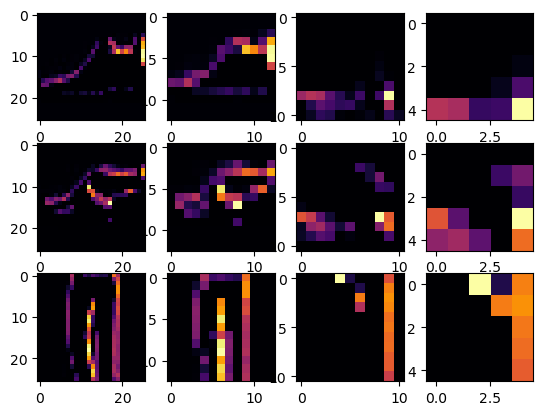

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 31

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)